In [1]:
import numpy as np

In [181]:
kB = 1

In [204]:
class NoseHoover():

    def __init__(self, dt, M = 1, num_particles = 1, T = 1):
        self.n_c = 1
        self.M = M
        self.v_epsilon = np.zeros(M)
        self.epsilon = np.zeros(M)
        self.Q = np.full(M, 0.1)
        self.dt = dt
        self.T = T
        self.num_particles = num_particles

    
    def h_prime(self, r, v, m):
        total_system_energy = U(r).sum() + 0.5 * np.sum(m * v**2).item()
#         total_system_energy = U(r) + 0.5 * np.sum(m * v**2).item()
        total_surrounding_energy = (self.num_particles * self.epsilon[0]) * kB * self.T + 0.5 * np.sum(self.Q * self.v_epsilon**2)
        return total_system_energy + total_surrounding_energy
    
    def step(self, m, v):
        KE = 0.5 * np.sum(m * v**2)
        T = self.T
        N_f = self.num_particles
        M = self.M
        delta_ts = self.dt / self.n_c
        SCALE = 1.0
        for i in range(self.n_c):
            
            
            G_1 = (2 * KE - N_f * kB * T) / self.Q[0]
            self.v_epsilon[0] = self.v_epsilon[0] + (delta_ts / 4) * G_1
            
            

            SCALE = SCALE * (np.exp(-1 * delta_ts * self.v_epsilon[0] / 2))
            
            KE = KE * np.exp(-1 * delta_ts * self.v_epsilon[0])
            
            for i in range(0, M):
                self.epsilon[i] = self.epsilon[i] + (delta_ts / 2) * self.v_epsilon[i]
            
            

            
            G_1 = (2 * KE - N_f * kB * T) / self.Q[0]
            
            
            self.v_epsilon[0] = self.v_epsilon[0] + (delta_ts / 4) * G_1
        
        v_new = v * SCALE
        return v_new
        

In [177]:
def T(m, v, N):
    return np.sum(m * v**2).item() / (kB * N)  

In [145]:
def U(r):
    return 2 * (r  - 2)**2

def F(r):
    return -4*(r - 2)

# n_p = 1

In [118]:
m = np.ones((1))

dt = 1e-3
v = np.ones((1, 1)) + 1
r = np.ones((1, 1)) + 7

In [119]:
v = np.ones((1, 1)) + 1
r = np.ones((1, 1)) + 7
nht = NoseHoover(dt)
h_primes = [nht.h_prime(r, v, m)]
for _ in range(10000):
    v = nht.step(m, v)

    v = v + (F(r) / (2 * m)) * dt
    r = r + v * dt
    v = v + (F(r) / (2 * m)) * dt

    v = nht.step(m, v)
    h_primes.append(nht.h_prime(r, v, m))

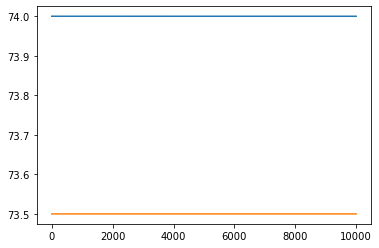

In [8]:
import matplotlib.pyplot as plt
plt.plot(h_primes)

y = np.ones_like(h_primes)
y[:] = 2
z = np.ones_like(h_primes)
z[:] = 73.5
# plt.plot(y)
plt.plot(z)

## n_p = 10

In [212]:
nParticles = 10
m = np.ones((nParticles, 1))
# r = np.random.normal(2.5, 0.5, size = (nParticles, 1))
# v = np.random.normal(0, 1, size = (nParticles, 1))
r = np.ones((nParticles, 1))
v = np.ones((nParticles, 1))
print(T(m, v, nParticles))

1.0


In [213]:
nht = NoseHoover(dt, num_particles = nParticles, T = 1)
h_primes = [nht.h_prime(r, v, m)]
temperatures = [T(m, v, nParticles)]

In [214]:
for _ in range(10000):
    v = nht.step(m, v)
#     print(v)
    v = v + (F(r) / (2 * m)) * dt
    r = r + v * dt
    v = v + (F(r) / (2 * m)) * dt

    v = nht.step(m, v)
    h_primes.append(nht.h_prime(r, v, m))
    temperatures.append(T(m, v, nParticles))

In [215]:
print(nht.h_prime(r, v, m))

44.99886809890978


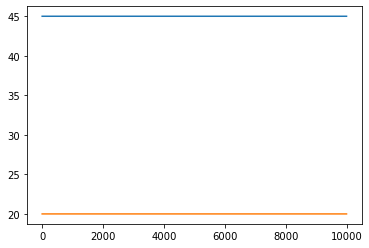

In [216]:
import matplotlib.pyplot as plt
plt.plot(h_primes)


y = np.ones_like(h_primes)
y[:] = 20
plt.plot(y)
# # z = np.ones_like(h_primes)
# # z[:] = 3.1

# plt.plot(z)

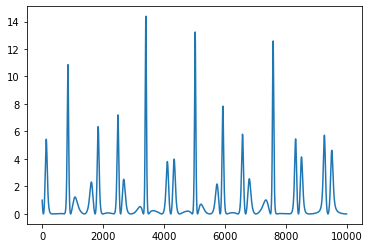

In [217]:
plt.plot(temperatures)

In [239]:
print(temperatures[-1000])

0.038535452080144944


# Leach 1D

In [218]:
nParticles = 10
m = np.ones((nParticles, 1))
r = np.ones((nParticles, 1))
v = np.ones((nParticles, 1))

In [219]:
def __pot_energy(x):
    if x < -1.25:
        return (4 * (np.pi**2)) * (x + 1.25)**2

    if x >= -1.25 and x <= -0.25:
        return 2 * (1 + np.sin(2 * np.pi * x))

    if x >= -0.25 and x <= 0.75:
        return 3 * (1 + np.sin(2 * np.pi * x))

    if x >= 0.75 and x <= 1.75:
        return 4 * (1 + np.sin(2 * np.pi * x))

    # if x >= 1.75:
    return 64 * ((x - 1.75) ** 2)

def U(x):
    reduced_x = x.squeeze()
    pot = 0
    for i in reduced_x:
        pot += __pot_energy(i)
    return pot

In [220]:
def __force(x):
    if x <= -1.25:
        return (-8 * (np.pi)**2) * (x + 1.25)

    if x > -1.25 and x <= -0.25:
        return -4 * np.pi * np.cos(2 * np.pi * x)

    if x >= -0.25 and x <= 0.75:
        return -6 * np.pi * np.cos(2 * np.pi * x)

    if x >= 0.75 and x <= 1.75:
        return -8 * np.pi * np.cos(2 * np.pi * x)

#     if x >= 1.75:
    return -(128) * (x - 1.75)

def F(x):
    forces = []
    reduced_x = x.squeeze()
    for particle in reduced_x:
        f = __force(particle)
        forces.append(f)
    F_x = np.array(forces).reshape(x.shape)
    return F_x

In [221]:
nht = NoseHoover(dt, num_particles = nParticles)
h_primes = [nht.h_prime(r, v, m)]
temperatures = [T(m, v, nParticles)]

In [222]:
print(h_primes)

[44.99999999999999]


In [223]:
for _ in range(10000):
    v = nht.step(m, v)

    v = v + (F(r) / 2) * dt
    r = r + v * dt
    v = v + (F(r) / 2) * dt

    v = nht.step(m, v)
    h_primes.append(nht.h_prime(r, v, m))
    temperatures.append(T(m, v, nParticles))

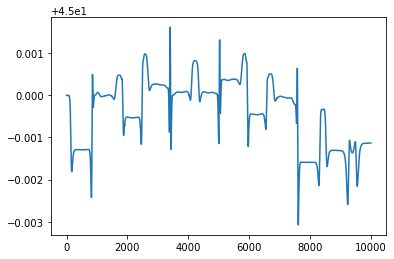

In [224]:
plt.plot(h_primes)
# plt.axhline(y = 56.5)

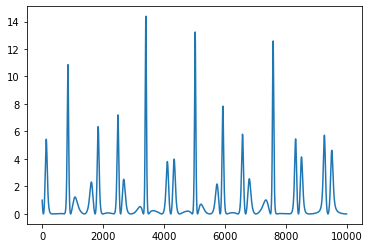

In [225]:
plt.plot(temperatures)